In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from PIL import Image
from matplotlib import pyplot as plt
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# Menentukan folder untuk menyimpan log TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Membuat callback TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# PREPROCESSING DATA

In [4]:
# Membuat class myCallback untuk menghentikan training ketika akurasi sudah mencapai 86% dan val_acc sudah mencapai 86%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.84 and logs.get('val_acc') > 0.84:
            print("\nAkurasi telah mencapai >86%!")
            self.model.stop_training = True

In [5]:
TRAINING_DIR = './data/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128, # 128 images per batch 
    class_mode='binary' # binary labels
    )

        
VALIDATION_DIR = './data/valid'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=32,
class_mode='binary')

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


# DEFINE MODEL

In [6]:
# Model Definition
model = tf.keras.models.Sequential([
    # Convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Counting Features and Labels
input_shape = (150, 150, 3)
jumlah_fitur = input_shape[0] * input_shape[1] * input_shape[2]
jumlah_label = 2

print("Jumlah Fitur:", jumlah_fitur)
print("Jumlah Label:", jumlah_label)



Jumlah Fitur: 67500
Jumlah Label: 2


In [7]:
# lihat arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 64)                1

# COMPILE A MODEL

In [7]:
# Compile a Model

"""
Kasus yang dihadapi disini adalah binary class jadi kita harus menggunakan loss function yang bernama binary crossentropy

"""
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['acc']
   
)

# Train the model

callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)


Epoch 1/20


6/6 [==============================] - 11s 1s/step - loss: 0.8936 - acc: 0.5390 - val_loss: 0.6533 - val_acc: 0.5817
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 0.6058 - acc: 0.6978 - val_loss: 0.5208 - val_acc: 0.7452
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 0.5518 - acc: 0.7187 - val_loss: 0.4726 - val_acc: 0.7740
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 0.4880 - acc: 0.7702 - val_loss: 0.4494 - val_acc: 0.8029
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.4016 - acc: 0.8301 - val_loss: 0.5148 - val_acc: 0.7788
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 0.3892 - acc: 0.8370 - val_loss: 0.4525 - val_acc: 0.7981
Epoch 7/20
6/6 [==============================] - 8s 1s/step - loss: 0.3724 - acc: 0.8384 - val_loss: 0.3555 - val_acc: 0.8510
Epoch 8/20
6/6 [==============================] - 6s 1s/step - loss: 0.3496 - acc: 0.8468 - val_loss: 0.309

# PERFORMING ERROR ANALYSIS

<Figure size 640x480 with 0 Axes>

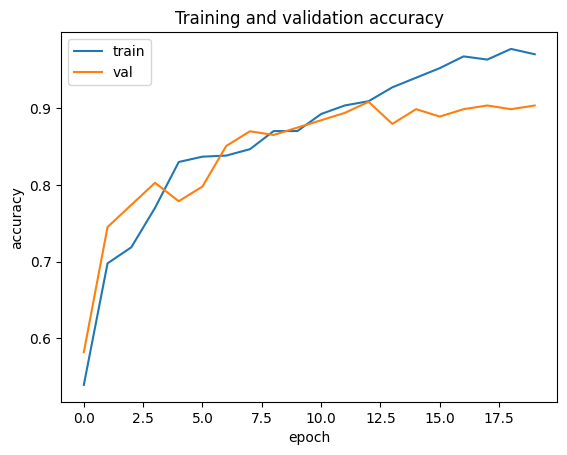

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy per epoch

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

In [8]:
# save model

model.save("icecreamorpizza.h5")

c:\Users\ASUS\OneDrive\Documents\Kuliah\Semester 5\AI\Tugas2\tugasAI\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# INFERENCE

In [23]:
# Function to predict the class of the uploaded image
from keras.preprocessing import image
import numpy as np

def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    return classes[0][0]

# Upload an image from your local system
def upload_and_predict():
    image_path = input("Enter the file path of the image: ")
    confidence = predict_image_class(image_path)
    if confidence > 0.5:
        print(f"The image is predicted as a pizza")
    else:
        print(f"The image is predicted as a ice cream")

# Perform the image upload and prediction
upload_and_predict()

1/1 [==============================] - 0s 30ms/step
The image is predicted as a pizza


In [15]:
%load_ext tensorboard
%tensorboard --logdir=./logs/fit/20231126-200821

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6010 (pid 20504), started 0:00:09 ago. (Use '!kill 20504' to kill it.)